## Load Libraries and Data

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [79]:
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv'
)
len(df)

9704

In [5]:
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


## Clean the Dataset

In [80]:
# clean column names 

df.columns = df.columns.str.lower().str.replace(' ', '_')

# clean the object value to string
string_columns = list(df.dtypes[df.dtypes == 'object'].index)

for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [7]:
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,europe,gasoline,all-wheel_drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,usa,gasoline,front-wheel_drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,europe,gasoline,front-wheel_drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,usa,diesel,all-wheel_drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,europe,gasoline,all-wheel_drive,2.0,12.488369


### Preparing the dataset 

Use only the following columns:

'engine_displacement',
'horsepower',
'vehicle_weight',
'model_year',
'fuel_efficiency_mpg'



In [81]:
col = ['engine_displacement',
'horsepower',
'vehicle_weight',
'model_year',
'fuel_efficiency_mpg'
]

df = df[col]

In [82]:
df.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369


## EDA

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

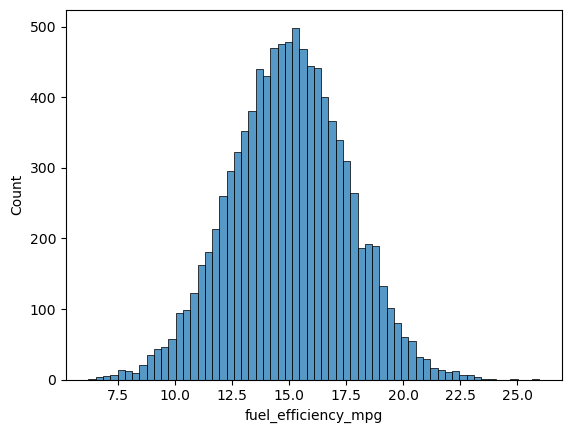

In [10]:
# Look at the fuel_efficiency_mpg variable. Does it have a long tail?

sns.histplot(df.fuel_efficiency_mpg)

It seems pretty normal to me so no tail.

# Question 1

There's one column with missing values. What is it?

'engine_displacement'
'horsepower'
'vehicle_weight'
'model_year'

In [11]:
# check null 

df.isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

A: 'horsepower'

# Question 2

What's the median (50% percentile) for variable 'horsepower'?

In [12]:
df.horsepower.describe()

count    8996.000000
mean      149.657292
std        29.879555
min        37.000000
25%       130.000000
50%       149.000000
75%       170.000000
max       271.000000
Name: horsepower, dtype: float64

A: 149.000000

## Prepare and split the dataset

Shuffle the dataset (the filtered one you created above), use seed 42.
Split your data in train/val/test sets, with 60%/20%/20% distribution.
Use the same code as in the lectures

In [13]:
# amount of data to split

n = len(df)

n_val = int(n*0.2)
n_test = int(n*0.2)
n_train = n-n_val-n_test

n_val, n_test, n_train

(1940, 1940, 5824)

In [14]:
# split the data randomly

np.random.seed(42)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

In [15]:
# set the tartget valuable

y_train_orig = df_train.fuel_efficiency_mpg.values
y_val_orig = df_val.fuel_efficiency_mpg.values
y_test_orig = df_test.fuel_efficiency_mpg.values

y_train = np.log1p(y_train_orig)
y_val = np.log1p(y_val_orig)
y_test = np.log1p(y_test_orig)

# delete target in dataset to avoid training

del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

# Question 3

We need to deal with missing values for the column from Q1.
We have two options: fill it with 0 or with the mean of this variable.
Try both options. For each, train a linear regression model without regularization using the code from the lessons.
For computing the mean, use the training only!
Use the validation dataset to evaluate the models and compare the RMSE of each option.
Round the RMSE scores to 2 decimal digits using round(score, 2)

Which option gives better RMSE?

In [43]:
# fill with 0

df_zero = df_train.fillna(0)
df_zero_val = df_val.fillna(0)

In [27]:
df_zero.isnull().sum()

engine_displacement    0
horsepower             0
vehicle_weight         0
model_year             0
fuel_efficiency_mpg    0
dtype: int64

In [44]:
# fill with mean

df_mean = df_train.fillna(149.657292)
df_mean_val = df_val.fillna(149.657292)

In [30]:
# prepare matric

def prepare_X(df):
    X = df.values
    return X

In [29]:
# linear regression

def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [75]:
#Root Mean Squared Error

def rmse(y, y_pred): 
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

### Fill with 0

In [40]:
X_train = prepare_X(df_zero)
w_0, w = train_linear_regression(X_train, y_train)

In [41]:
y_pred = w_0 + X_train.dot(w)

In [50]:
rmse(y_train, y_pred).round(2)

0.04

In [45]:
X_val = prepare_X(df_zero_val)
y_val_pred = w_0 + X_val.dot(w)

In [49]:
rmse(y_val, y_val_pred).round(2)

0.04

### Fill with mean

In [51]:
X_train = prepare_X(df_mean)
w_0, w = train_linear_regression(X_train, y_train)

In [52]:
y_pred = w_0 + X_train.dot(w)

In [56]:
rmse(y_train, y_pred).round(2)

0.04

In [54]:
X_val = prepare_X(df_mean_val)
y_val_pred = w_0 + X_val.dot(w)

In [55]:
rmse(y_val, y_val_pred).round(2)

0.04

A: Both are equally good

# Question 4

Now let's train a regularized linear regression.
For this question, fill the NAs with 0.
Try different values of r from this list: [0, 0.01, 0.1, 1, 5, 10, 100].
Use RMSE to evaluate the model on the validation dataset.
Round the RMSE scores to 2 decimal digits.

Which r gives the best RMSE?

If multiple options give the same best RMSE, select the smallest r.

In [57]:
# regularisation

def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [62]:
X_train = prepare_X(df_zero)

for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w_0 + X_val.dot(w)
    print('%6s' %r, rmse(y_val, y_pred).round(2))


     0 0.04
  0.01 0.04
   0.1 0.04
     1 0.04
     5 0.04
    10 0.04
   100 0.04


A: 0

# Question 5

We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
For each seed, do the train/validation/test split with 60%/20%/20% distribution.
Fill the missing values with 0 and train a model without regularization.
For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
Round the result to 3 decimal digits (round(std, 3))

In [90]:
seed_value = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
score_d = []

for seed in seed_value:
    np.random.seed(seed)

    idx = np.arange(n)
    np.random.shuffle(idx)

    df_shuffled = df.iloc[idx]

    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()
    
    # set the tartget valuable

    y_train_orig = df_train.fuel_efficiency_mpg.values
    y_val_orig = df_val.fuel_efficiency_mpg.values
    y_test_orig = df_test.fuel_efficiency_mpg.values

    y_train = np.log1p(y_train_orig)
    y_val = np.log1p(y_val_orig)
    y_test = np.log1p(y_test_orig)

    # delete target in dataset to avoid training

    del df_train['fuel_efficiency_mpg']
    del df_val['fuel_efficiency_mpg']
    del df_test['fuel_efficiency_mpg']
    
    # linear regression
    X_train = prepare_X(df_train.fillna(0))
    w_0, w = train_linear_regression(X_train, y_train)
    y_pred = w_0 + X_train.dot(w)
    X_val = prepare_X(df_val.fillna(0))
    y_pred = w_0 + X_val.dot(w)
    
    #store scores
    score_d.append({'seed': seed, 'rmse_score':rmse(y_val, y_pred)})
    
score_df = pd.DataFrame(score_d)
print(score_df)

   seed  rmse_score
0     0    0.038018
1     1    0.039279
2     2    0.039447
3     3    0.038728
4     4    0.037275
5     5    0.039384
6     6    0.038908
7     7    0.038380
8     8    0.040190
9     9    0.038608


In [95]:
# Calculate standard deviation of RMSE scores
round(np.std(score_df.rmse_score),3)

0.001

# Question 6

Split the dataset like previously, use seed 9.
Combine train and validation datasets.
Fill the missing values with 0 and train a model with r=0.001.
What's the RMSE on the test dataset?

In [101]:
np.random.seed(9)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()
    
# set the tartget valuable

y_train_orig = df_train.fuel_efficiency_mpg.values
y_val_orig = df_val.fuel_efficiency_mpg.values
y_test_orig = df_test.fuel_efficiency_mpg.values

y_train = np.log1p(y_train_orig)
y_val = np.log1p(y_val_orig)
y_test = np.log1p(y_test_orig)

# delete target in dataset to avoid training

del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

In [102]:
df_full_train = pd.concat([df_train, df_val]).reset_index(drop = True)

In [104]:
y_full_train = np.concatenate([y_train, y_val])

In [103]:
df_full_train = df_full_train.fillna(0)

In [113]:
X_full_train = prepare_X(df_full_train)
w_0, w = train_linear_regression_reg(X_full_train, y_full_train, r = 0.001)
X_test = prepare_X(df_test.fillna(0))
y_pred = w_0 + X_test.dot(w)

y_pred_unlog = np.expm1(y_pred)
y_test_unlog = np.expm1(y_test)

score = rmse(y_test_unlog, y_pred_unlog)
print(score)

score_log = rmse(y_test, y_pred)
print(score_log)

0.6073861396064968
0.03919613644532434
